In [5]:
import io                        #The io module provides Python’s main facilities for dealing with various types of I/O.
import json                      #JSON (JavaScript Object Notation) is a lightweight data-interchange format
import cv2                       #cv2.imread(), cv2.imshow() , cv2.imwrite()
import numpy as np               #create a NumPy array, use broadcasting, access values, manipulate arrays, and much more
import requests                  #Make a request to a web page, and print the response text
import matplotlib.pyplot as plt  #Matplotlib is a comprehensive library  visualizations in Python.
import easyocr                   #OCR engine.
from PIL import Image, ImageDraw, ImageFont

c:\Users\ranas\anaconda3\envs\my_init\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def ocr_reader(image_path):

    # Read image 
    image = Image.open(image_path)
    img_pil = image
    MAX_SIZE = 2000
    # Resize image
    if img_pil.height > MAX_SIZE or img_pil.width > MAX_SIZE:
        scale = max(img_pil.height / MAX_SIZE, img_pil.width / MAX_SIZE)

        new_width = int(img_pil.width / scale + 0.5)
        new_height = int(img_pil.height / scale + 0.5)
        img_pil = img_pil.resize((new_width, new_height), Image.BICUBIC)

    print(img_pil.width, img_pil.height)
    
    # create easyocr reader
    reader = easyocr.Reader(['ch_sim','en'], gpu=False)
    result = reader.readtext(image,detail = 1)

    # convert image to grey scale
    gray_pil = img_pil.convert("L")
    img_draw = ImageDraw.Draw(gray_pil)
    colors = ['red', 'green', 'blue', "yellow", "pink"]

    # draw bounding box
    for i, rect in enumerate(result):
        bottomX, bottomY, topX , topY = rect[0]
        x, y, w, h = bottomX[0], bottomX[1] , bottomY[0]- bottomX[0] ,topX[1] - bottomX[1] 
        img_draw.rectangle(
            (x, y, x + w, y + h),
            outline=colors[i % len(colors)],
            width=4)

    img_pil

    blank_pil = Image.new("L", img_pil.size, 255)
    blank_draw = ImageDraw.Draw(blank_pil)

    # draw text
    for line in result:
        bottomX, bottomY, topX , topY = line[0]
        x, y, w, h = bottomX[0], bottomX[1] , bottomY[0]- bottomX[0] ,topX[1] - bottomX[1] 
        txt = line[1]
        font = ImageFont.truetype("arial.ttf", max(int(h * 0.6), 12))
        blank_draw.text(xy=(x, y), text=txt, font=font)

    blank_pil

    return img_pil, blank_pil


Using CPU. Note: This module is much faster with a GPU.


730 514


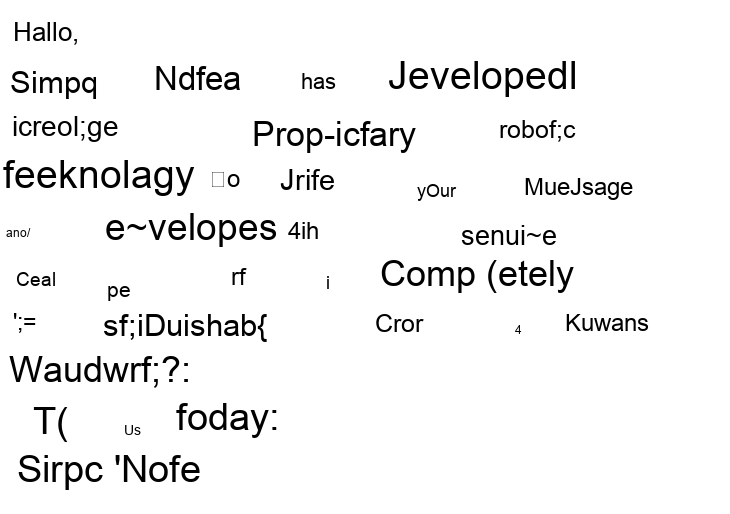

In [7]:
img_pil , image = ocr_reader("images\Penwritten.jpg")
image